# Описать кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -беск до +беск ) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])

# Лабораторная работа №2

ФИО: Попов Вячеслав Игоревич
Группа: БИВТ-22-СП-5

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить.
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap.

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("students_adaptability_level_online_education.csv")
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


#2. Постановка задачи и целевая переменная
Необходимо предсказать уровень адаптивности студентов к онлайн-образованию (Adaptivity Level) на основе характеристик студентов.

Целевая переменная: Adaptivity Level.

Тип целевой переменной: дискретная. Классы:
  - High
  - Moderate
  - High

Признаки (features):
Gender,Age, Education Level,Institution Type,
IT Student,Location, Load-shedding, Financial Condition,
Internet Type, Network Type,Class Duration, Self Lms, Device.



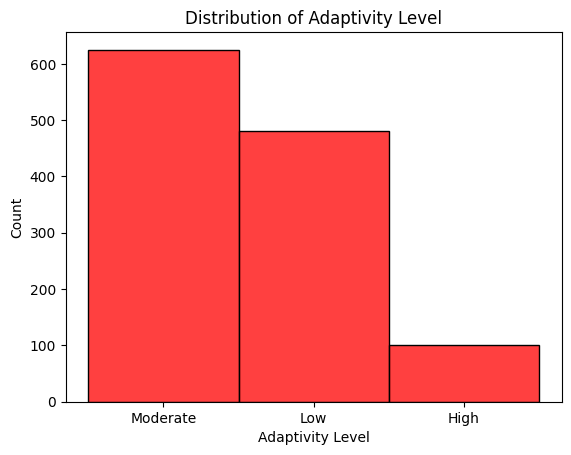

In [ ]:
sns.histplot(data['Adaptivity Level'], bins=20, kde=False, color='red')

plt.title('Distribution of Adaptivity Level')
plt.show()



In [20]:
data.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


<ipython-input-18-164f89e821bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='Set2')


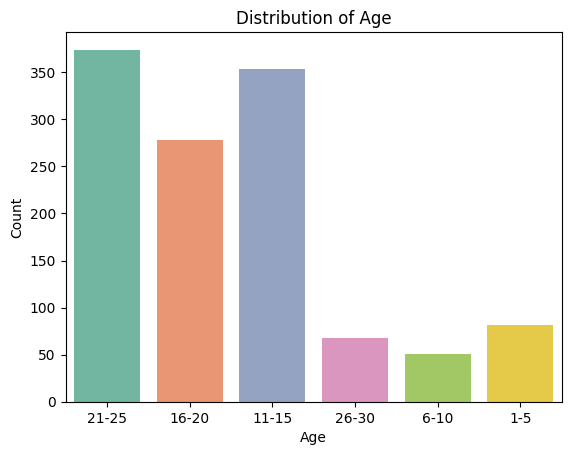

<ipython-input-18-164f89e821bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='Set2')


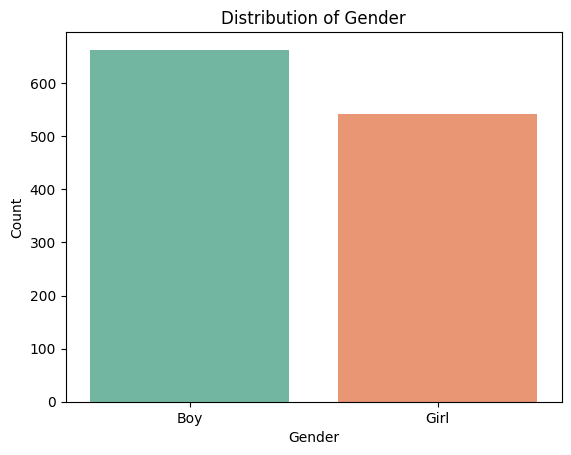

<ipython-input-18-164f89e821bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='Set2')


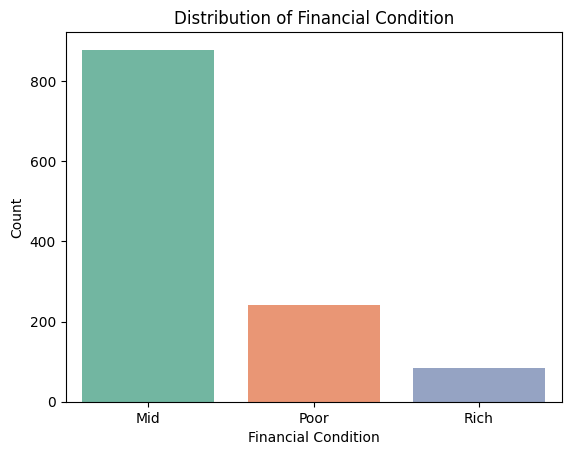

<ipython-input-18-164f89e821bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='Set2')


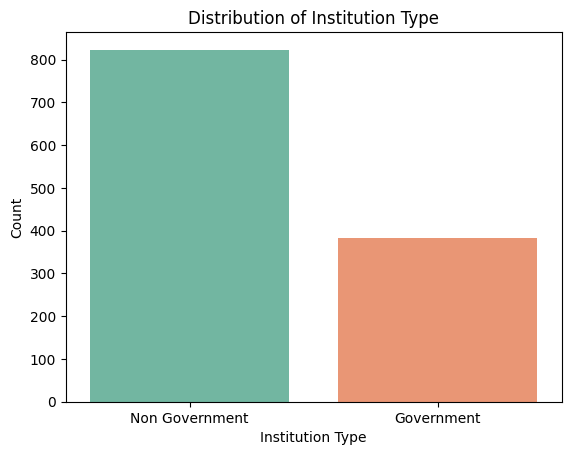

<ipython-input-18-164f89e821bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='Set2')


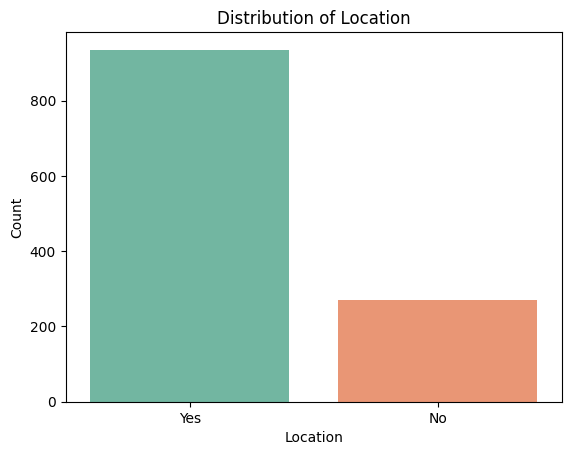

In [18]:
# Выбор признаков для визуализации
features = ['Age', 'Gender', 'Financial Condition', 'Institution Type', 'Location']

# Построение гистограмм
for feature in features:
    plt.figure()
    if data[feature].dtype == 'object':
        sns.countplot(x=feature, data=data, palette='Set2')
    else:
        sns.histplot(data[feature], bins=20, kde=True, color='seagreen')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count' if data[feature].dtype == 'object' else 'Density')
    plt.show()

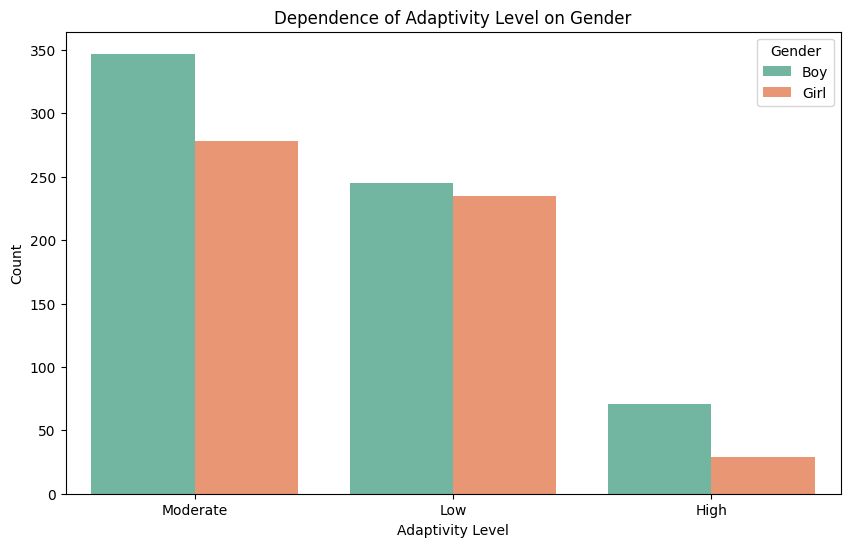

In [22]:
# Зависимость гендера от adaptivity level
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Adaptivity Level', hue='Gender', palette='Set2')
plt.title('Dependence of Adaptivity Level on Gender')
plt.xlabel('Adaptivity Level')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

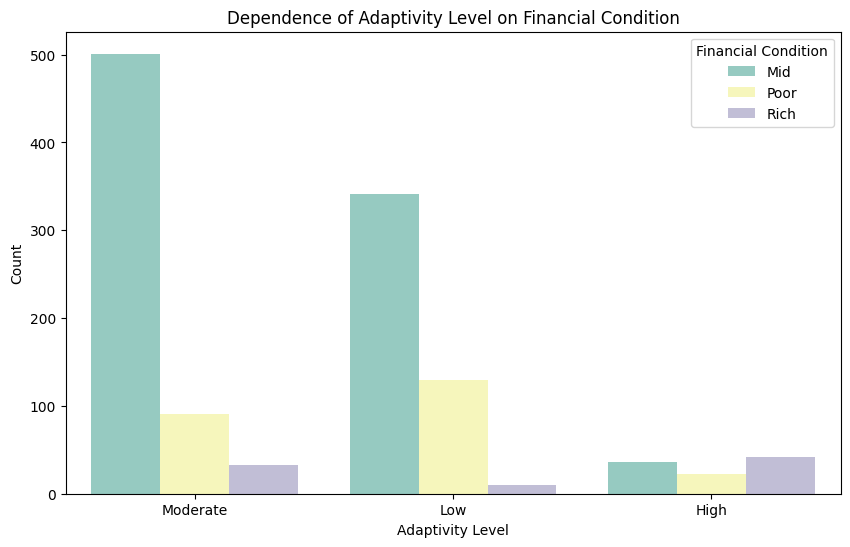

In [23]:
#Зависимость от финансового положения
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Adaptivity Level', hue='Financial Condition', palette='Set3')
plt.title('Dependence of Adaptivity Level on Financial Condition')
plt.xlabel('Adaptivity Level')
plt.ylabel('Count')
plt.legend(title='Financial Condition')
plt.show()

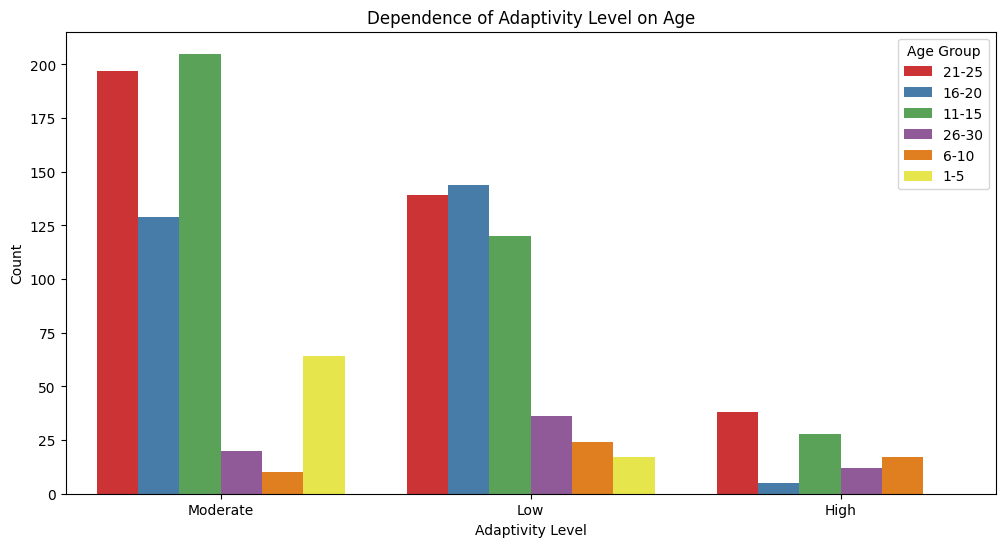

In [24]:
#Зависимость от возраста
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Adaptivity Level', hue='Age', palette='Set1')
plt.title('Dependence of Adaptivity Level on Age')
plt.xlabel('Adaptivity Level')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

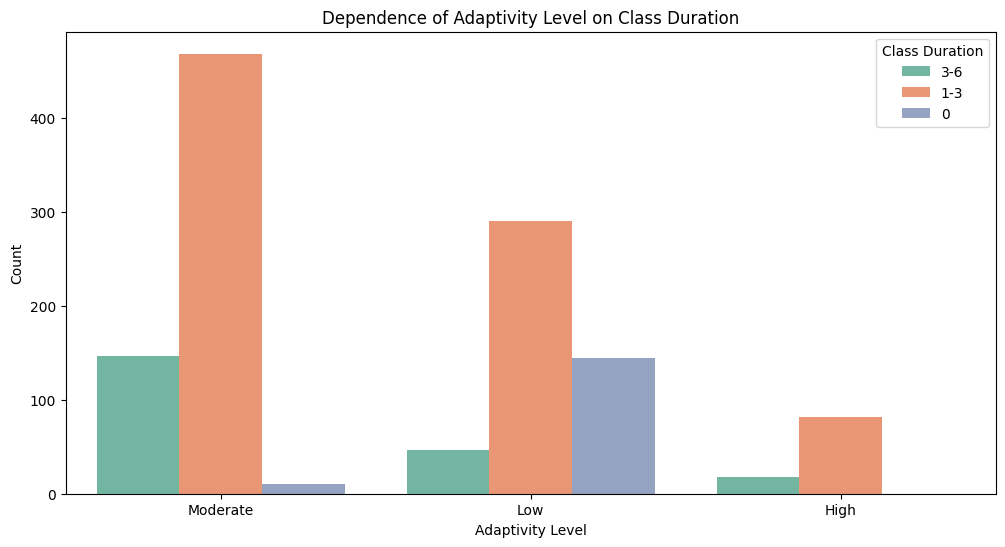

In [25]:
# Зависимость от длительности занятия
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Adaptivity Level', hue='Class Duration', palette='Set2')
plt.title('Dependence of Adaptivity Level on Class Duration')
plt.xlabel('Adaptivity Level')
plt.ylabel('Count')
plt.legend(title='Class Duration')
plt.show()

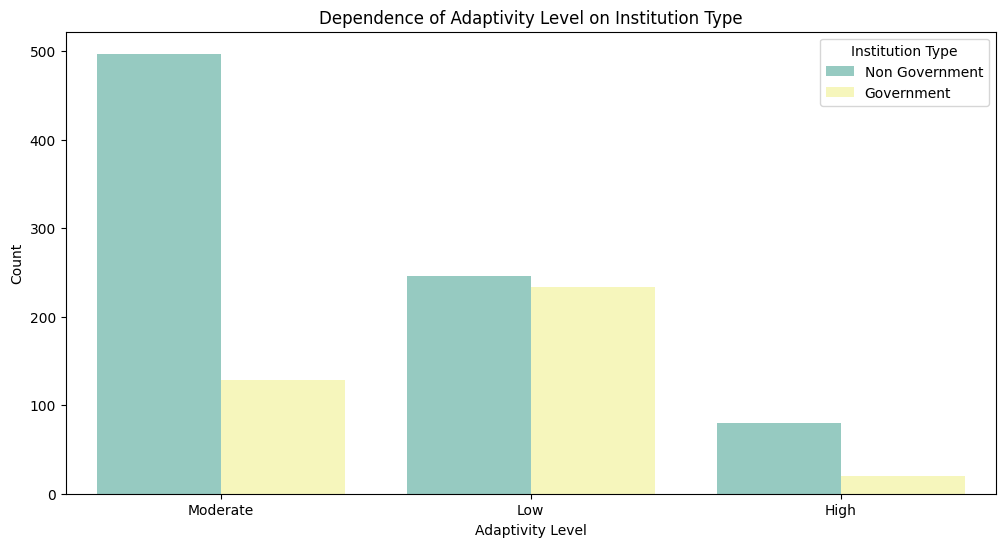

In [26]:
# Зависимость от типа учреждения
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Adaptivity Level', hue='Institution Type', palette='Set3')
plt.title('Dependence of Adaptivity Level on Institution Type')
plt.xlabel('Adaptivity Level')
plt.ylabel('Count')
plt.legend(title='Institution Type')
plt.show()

# Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)

# extra (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная , по оси OY -- переменная . И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap.